In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from util import PROJECTS_FILE, FILTERED_FILE
#reads projects from Excel file
df = pd.read_excel(PROJECTS_FILE, keep_default_na=False)
len(df)

25011

In [3]:
df = df[df.contributors >= 10]
df = df[df.commits >= 1000]
len(df)

10823

In [4]:
df = df[df.primaryLanguage == 'Java']
df.createdAt = pd.to_datetime(df.createdAt).dt.tz_localize(None) 
df.pushedAt = pd.to_datetime(df.pushedAt).dt.tz_localize(None)
df.to_excel(FILTERED_FILE, index=False)
len(df)


797

In [5]:
df.primaryLanguage.value_counts()

Java    797
Name: primaryLanguage, dtype: int64

In [6]:
len(df.primaryLanguage.value_counts())

1

In [7]:
#filters repositories by language, keeping just the ones that use the top 10 languages in the corpus 
df = df.groupby('primaryLanguage').filter(lambda x: len(x) >= 18)
len(df)

797

In [8]:
pd.set_option('display.max_colwidth', -1) 
df

/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_52874/3122345047.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,owner,name,createdAt,pushedAt,isMirror,diskUsage,primaryLanguage,languages,contributors,watchers,stargazers,forks,issues,commits,pullRequests,branches,tags,releases,description
29,Snailclimb,JavaGuide,2018-05-07 13:27:00,2024-06-30 14:24:04,False,175339,Java,2,516,4522,144522,45385,1011,5415,1320,2,0,0,「Java学习+面试指南」一份涵盖大部分 Java 程序员所需要掌握的核心知识。准备 Java 面试，首选 JavaGuide！
64,iluwatar,java-design-patterns,2014-08-09 16:45:18,2024-06-30 03:48:23,False,34835,Java,4,418,3782,88213,26175,937,4091,2036,5,20,0,Design patterns implemented in Java
84,krahets,hello-algo,2022-11-04 11:08:34,2024-06-28 16:47:46,False,343894,Java,9,168,455,79137,10026,188,1997,1012,6,8,8,"《Hello 算法》：动画图解、一键运行的数据结构与算法教程。支持 Python, Java, C++, C, C#, JS, Go, Swift, Rust, Ruby, Kotlin, TS, Dart 代码。简体版和繁体版同步更新，English version ongoing"
101,spring-projects,spring-boot,2012-10-19 15:02:57,2024-06-30 11:17:42,False,174304,Java,13,1100,3360,73538,40308,34504,49394,6287,20,316,277,Spring Boot
114,elastic,elasticsearch,2010-02-08 13:20:56,2024-06-30 14:42:56,False,1206777,Java,20,3532,2685,68500,24330,35453,78237,74504,345,398,149,"Free and Open, Distributed, RESTful Search Engine"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24717,xerial,snappy-java,2012-09-06 01:30:21,2024-06-27 04:14:53,False,37756,Java,8,61,54,1016,233,217,1164,365,45,79,24,Snappy compressor/decompressor for Java
24719,SkriptLang,Skript,2016-03-08 13:42:04,2024-06-30 10:07:20,False,23631,Java,2,102,52,1016,356,4553,3660,2109,78,162,137,"Skript is a Spigot plugin which allows server admins to customize their server easily, but without the hassle of programming a plugin or asking/paying someone to program a plugin for them."
24781,mixpanel,mixpanel-android,2010-08-05 04:51:12,2024-05-31 04:20:03,False,31223,Java,3,132,110,1012,364,468,2166,365,143,139,113,Official Android Tracking Library for Mixpanel Analytics
24856,belaban,JGroups,2010-11-07 15:51:28,2024-06-27 08:27:26,False,62400,Java,5,88,94,1008,471,0,20160,765,23,323,0,The JGroups project


In [9]:
df.describe()

,diskUsage,languages,contributors,watchers,stargazers,forks,issues,commits,pullRequests,branches,tags,releases
count,7.970000e+02,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000
mean,2.524042e+05,7.450439,206.151819,245.176913,6228.120452,1826.597240,1749.720201,9237.834379,2300.077792,52.484316,361.060226,61.971142
std,1.190307e+06,6.093626,304.494628,404.189573,10502.840034,4030.044445,2994.142990,31489.510228,4780.020291,134.340409,2918.617742,107.843214
min,1.547000e+03,1.000000,10.000000,8.000000,1007.000000,23.000000,0.000000,1000.000000,3.000000,1.000000,0.000000,0.000000
25%,1.925700e+04,3.000000,56.000000,71.000000,1656.000000,385.000000,288.000000,1871.000000,299.000000,6.000000,38.000000,5.000000
50%,5.755400e+04,6.000000,112.000000,127.000000,2706.000000,755.000000,816.000000,3775.000000,804.000000,18.000000,85.000000,32.000000
75%,2.113200e+05,10.000000,221.000000,234.000000,5848.000000,1658.000000,1857.000000,8215.000000,2219.000000,45.000000,176.000000,77.000000
max,3.032165e+07,70.000000,3532.000000,4522.000000,144522.000000,54390.000000,35453.000000,814307.000000,74504.000000,2578.000000,73858.000000,1000.000000


In [10]:
#saves filtered projetcts to Excel
#removes timezone from dates, since Excel does not know how to handle that
df.createdAt = pd.to_datetime(df.createdAt).dt.tz_localize(None) 
df.pushedAt = pd.to_datetime(df.pushedAt).dt.tz_localize(None)
df.to_excel(FILTERED_FILE, index=False)

<AxesSubplot:ylabel='primaryLanguage'>

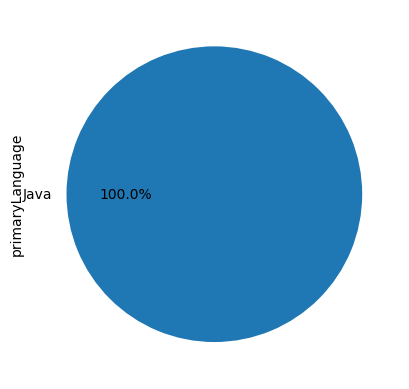

In [11]:
df.primaryLanguage.value_counts().plot(kind='pie', autopct='%1.1f%%')

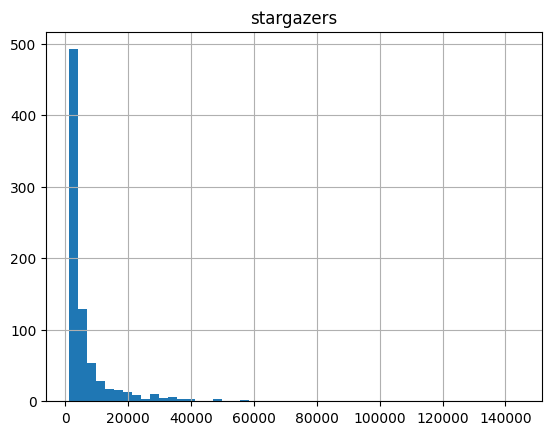

In [12]:
hist = df.hist(column=['stargazers'], bins=50)

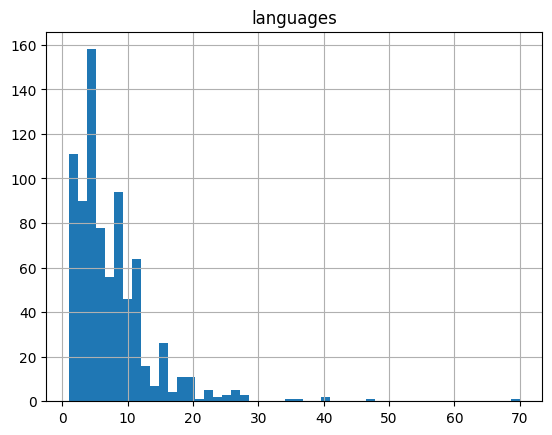

In [13]:
hist = df.hist(column=['languages'], bins=50)

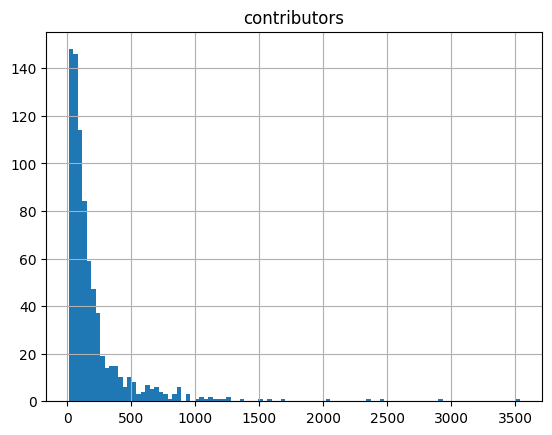

In [14]:
hist = df.hist(column=['contributors'], bins=100)

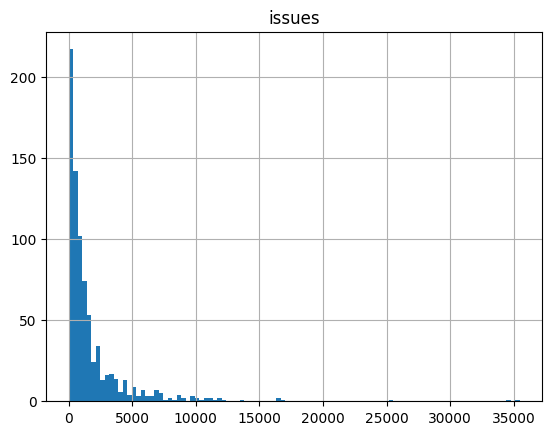

In [15]:
hist = df.hist(column=['issues'], bins=100)

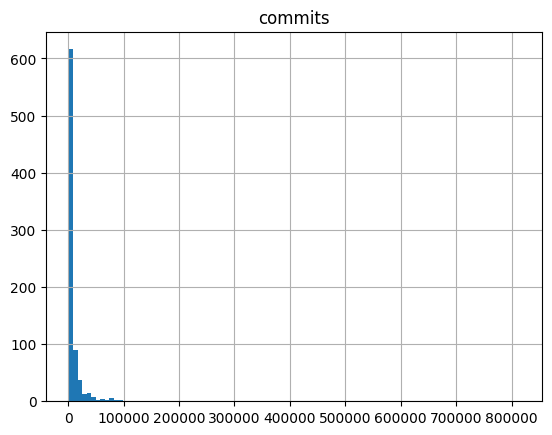

In [16]:
hist = df.hist(column=['commits'], bins=100)

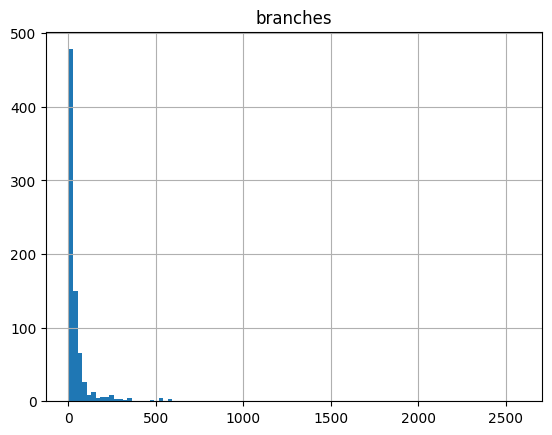

In [17]:
hist = df.hist(column=['branches'], bins=100)

Text(0.5, 0, 'KB')

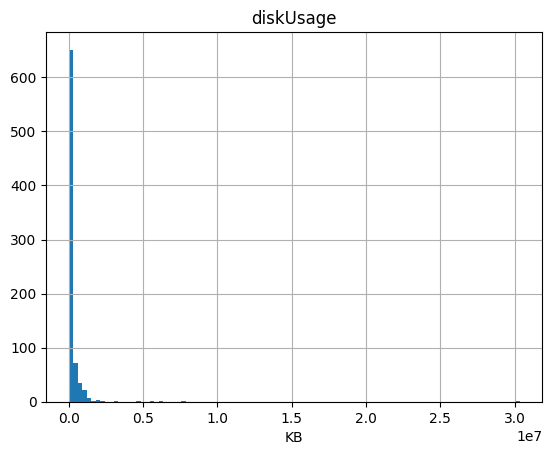

In [18]:
hist = df.hist(column=['diskUsage'], bins=100)
plt.xlabel("KB")

In [19]:
corr = df.drop('isMirror', axis=1).corr()
corr.style.background_gradient(cmap='Reds')

,diskUsage,languages,contributors,watchers,stargazers,forks,issues,commits,pullRequests,branches,tags,releases
diskUsage,1.000000,0.173210,0.167594,0.015387,0.031137,0.039591,0.052050,0.877206,0.120341,0.066023,0.021130,0.058360
languages,0.173210,1.000000,0.379456,0.077054,0.088637,0.181007,0.168187,0.248932,0.373949,0.255800,0.151762,-0.025901
contributors,0.167594,0.379456,1.000000,0.344594,0.309687,0.373296,0.469108,0.274450,0.617610,0.223742,0.103088,0.152457
watchers,0.015387,0.077054,0.344594,1.000000,0.856298,0.840601,0.412646,0.048373,0.244079,0.007408,0.003408,0.048434
stargazers,0.031137,0.088637,0.309687,0.856298,1.000000,0.812997,0.403600,0.042500,0.236612,-0.025711,-0.024452,0.029346
forks,0.039591,0.181007,0.373296,0.840601,0.812997,1.000000,0.425869,0.079624,0.298456,-0.006697,-0.012405,0.029517
issues,0.052050,0.168187,0.469108,0.412646,0.403600,0.425869,1.000000,0.151013,0.534645,0.099858,0.001750,0.200758
commits,0.877206,0.248932,0.274450,0.048373,0.042500,0.079624,0.151013,1.000000,0.244426,0.123998,0.041362,0.066592
pullRequests,0.120341,0.373949,0.617610,0.244079,0.236612,0.298456,0.534645,0.244426,1.000000,0.228370,0.032496,0.155432
branches,0.066023,0.255800,0.223742,0.007408,-0.025711,-0.006697,0.099858,0.123998,0.228370,1.000000,0.746433,0.047317
